In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import generatevector
from preprocess.parse import getRootSuffix
from argparse import Namespace
from tqdm import tqdm
import time
import CrossValidation
import warnings

In [2]:
def svd(vectors, dim=10):
    svd = TruncatedSVD(n_components=dim, n_iter=10,random_state=2019)
    svd_vectors = svd.fit_transform(vectors)
    svd_exp_ratio = svd.explained_variance_ratio_
    svd_cum_exp = svd.explained_variance_ratio_.sum()
    print('Cumulated Explained Variance: {:.8f}'.format(svd_cum_exp))
    return svd_vectors, svd_exp_ratio, svd_cum_exp

In [3]:
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = False, 
        other = True
    )
vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)

In [4]:
ReducedVector, ExplainedRatio, CumulatedVariance = svd(vectors, 5000)

Cumulated Explained Variance: 0.93633256


In [78]:
ExplainedRatio[:2500].sum()

0.7555076281293003

In [53]:
num_components = np.array(range(1,5001))
NumCom = np.arange(0, 5001, 200)
CEV = []
CEV100 = []
for i in range(5001):
    CEV = np.append(CEV, ExplainedRatio[0:i].sum())
    if i % 200 == 0:
        CEV100 = np.append(CEV100, ExplainedRatio[0:i].sum())

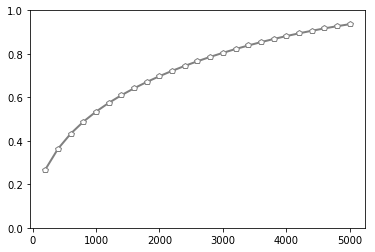

In [61]:
plt.plot(NumCom[1:], CEV100[1:], '-p', color='gray',
         markersize=6, linewidth=2,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=1)
plt.ylim(0, 1);

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import lightgbm as lgbm
import xgboost as xgb
warnings.filterwarnings("ignore")
seed = 2019
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
names = ["Logistic Regression", "Nearest Neighbors", "svm.LinearSVC", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "LightGBM", "XgBoost"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=7),
    svm.LinearSVC(),
    SVC(kernel="linear", probability=False, random_state=seed),
    SVC(kernel='rbf', probability=False, random_state=seed),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=seed),
    lgbm.LGBMClassifier(),
    xgb.XGBClassifier()]
classes = ["course", "department", "faculty", "other", "project", "staff", "student"]
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = False, 
        other = True
    )
vec = ReducedVector[:, :2500]
# vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)
for name, clf in zip(names, classifiers):
    print('='*100)
    print('='*100)
    print('='*100)
    label_t, label_p = CrossValidation.CrossValidation(clf, vec, labels, uni, classes, partial_p=False, cfsm=False)


Finished model LogisticRegression on cornell validation set
Execution Time: 00:00:09

Finished model LogisticRegression on texas validation set
Execution Time: 00:00:09

Finished model LogisticRegression on washington validation set
Execution Time: 00:00:09

Finished model LogisticRegression on wisconsin validation set
Execution Time: 00:00:09
============================== Report overall cross validation performance ==============================
Accuracy: 0.815769
Precision:0.812623
Recall:0.815769
F1_Score:0.812136

Finished model KNeighborsClassifier on cornell validation set
Execution Time: 00:00:07

Finished model KNeighborsClassifier on texas validation set
Execution Time: 00:00:07

Finished model KNeighborsClassifier on washington validation set
Execution Time: 00:00:09

Finished model KNeighborsClassifier on wisconsin validation set
Execution Time: 00:00:09
============================== Report overall cross validation performance ==============================
Accuracy: 0.62

KeyboardInterrupt: 